# IT326-project


## Phase 1


The aim of this project is to study students grades and classify them under specific categories such as Excellent, Good, and Satisfactory, while discovering the factors that affect them using data mining techniques. Data mining algorithms will be applied to extract patterns and relationships between students' grades and various factors, aiming to identify the main influences on academic performance.

## The source of the dataset https://www.kaggle.com/datasets/desalegngeb/students-exam-scores

## Motivation and Goal :
The purpose of this dataset is to use data mining algorithms such as classification and clustering to evaluate and understand the elements that influence students' test performance. We will apply classification algorithms to categorize students into high, medium, or low performance levels and use K-means clustering to group students based on performance and personal attributes.


## General information :

Number of attributes : 14 attributes

Number of Observations : more than 300,000



attributes Descriptions :

1- Gender: The gender of the student (male or female).

2- EthnicGroup: Ethnic group of the student (group A to E)

3-ParentEduc: Parent(s) education background (from some_highschool to master's degree)

4-LunchType: School lunch type (standard or free/reduced)

5-TestPrep: Test preparation course followed (completed or none)

6-ParentMaritalStatus: Parent(s) marital status (married/single/widowed/divorced)

7-PracticeSport: How often the student parctice sport (never/sometimes/regularly)

8-IsFirstChild: If the child is first child in the family or not (yes/no)

9-NrSiblings: Number of siblings the student has (0 to 7)

10- TransportMeans: Means of transport to school (schoolbus/private)

11- WklyStudyHours: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)

12- MathScore: math test score(0-100)

13- ReadingScore: reading test score(0-100)

14- WritingScore: writing test score(0-100)

-The Class label is the final grades of students in each subject (math, reading, and writing)

In [7]:
import pandas as pd
data = pd.read_csv('Expanded_data_with_more_features.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [8]:
rows, columns = data.shape
print(f"number of rows : {rows}, number of columns : {columns}")
print("names of attributes :\n", data.columns)
print("type of attributes :\n", data.dtypes)

number of rows : 30641, number of columns : 15
names of attributes :
 Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')
type of attributes :
 Unnamed: 0               int64
Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object


# Phase 2


In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [10]:
df = pd.read_csv("Expanded_data_with_more_features.csv",sep=",")
df
#Using the Pandas library's functionalities to read data from a CSV file
#into a Pandas DataFrame, enabling us to examine, and visualize the data.

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


### 20 Sample from the data

In [11]:
sample_data = df.sample(n=20);
sample_data

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
20843,182,female,group B,some high school,standard,NaN,single,sometimes,yes,6.0,school_bus,< 5,59,62,58
27883,749,female,group C,high school,standard,none,married,regularly,no,1.0,school_bus,5 - 10,72,74,71
4276,511,female,group E,some college,standard,completed,married,sometimes,yes,2.0,school_bus,< 5,77,86,87
2357,490,male,group D,bachelor's degree,standard,none,married,sometimes,no,2.0,private,< 5,63,61,56
2776,926,male,group D,associate's degree,standard,completed,divorced,regularly,no,2.0,school_bus,> 10,83,77,77
5040,314,male,group B,some high school,standard,none,single,regularly,yes,0.0,private,< 5,78,76,72
19355,590,male,group B,some college,standard,none,married,sometimes,yes,2.0,school_bus,5 - 10,83,82,76
13804,648,female,group D,NaN,standard,completed,single,sometimes,yes,6.0,private,5 - 10,60,73,75
7879,340,female,group C,high school,standard,NaN,divorced,regularly,yes,1.0,school_bus,5 - 10,61,72,72
7089,491,female,NaN,NaN,standard,completed,married,sometimes,yes,2.0,NaN,> 10,69,77,84


### 1. Statistical summary of the numerical data
The statistical summary provides an overview of the numerical data in the dataset. It includes important metrics such as count, mean, standard deviation, minimum, and maximum values, as well as the quartile distribution (25%, 50%, 75%). This summary helps understand the central tendency and spread of the data.

In [12]:
#  Statistical Summary
print("\nStatistical Summary of the DataFrame:")
display(df.describe())



Statistical Summary of the DataFrame:


,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


### 2- Correlation Coefficient & Variance & Mean & Median:

These are key descriptive statistics for understanding the relationships between variables and the overall distribution of your data.

Correlation Coefficient: This metric shows the relationship between numerical variables. A value close to 1 or -1 indicates a strong correlation, while a value close to 0 indicates no correlation.

Mean: The average value of the numerical columns. It helps to understand the central tendency of the data.

Variance: A measure of how much the data is spread out from the mean. High variance indicates more variability, while low variance indicates that data points are closer to the mean.

Median: The middle value when the data is sorted. The median is less affected by outliers compared to the mean.

In [13]:
# Select only numeric columns (float64 and int64)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation Coefficient Matrix
correlation = numeric_df.corr()
print("\nCorrelation Coefficient Matrix:")
display(correlation)

# Mean of numerical columns
mean_values = numeric_df.mean()
print("\nMean of the numerical columns:")
display(mean_values)

# Variance of numerical columns
variance = numeric_df.var()
print("\nVariance of the numerical columns:")
display(variance)

# Median of numerical columns
median_values = numeric_df.median()
print("\nMedian of the numerical columns:")
display(median_values)



Correlation Coefficient Matrix:


,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
Unnamed: 0,1.000000,-0.000096,-0.000476,-0.001349,-0.000781
NrSiblings,-0.000096,1.000000,-0.001195,-0.000874,-0.002554
MathScore,-0.000476,-0.001195,1.000000,0.817825,0.807118
ReadingScore,-0.001349,-0.000874,0.817825,1.000000,0.952584
WritingScore,-0.000781,-0.002554,0.807118,0.952584,1.000000



Mean of the numerical columns:


,0
Unnamed: 0,499.556607
NrSiblings,2.145894
MathScore,66.558402
ReadingScore,69.377533
WritingScore,68.418622



Variance of the numerical columns:


,0
Unnamed: 0,83375.346543
NrSiblings,2.126471
MathScore,235.979234
ReadingScore,217.826655
WritingScore,238.502459



Median of the numerical columns:


,0
Unnamed: 0,500.0
NrSiblings,2.0
MathScore,67.0
ReadingScore,70.0
WritingScore,69.0


### 3- Understanding the data through graph representations:

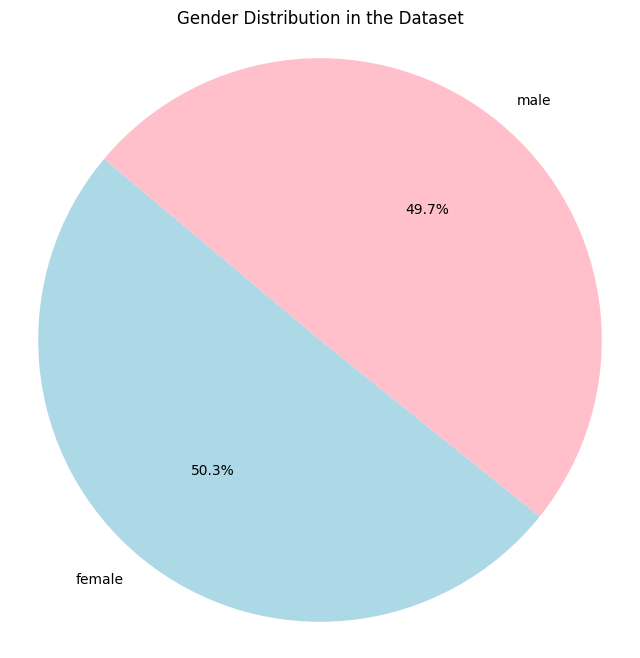

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('Expanded_data_with_more_features.csv')

# Create a pie chart for Gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'pink'], startangle=140)
plt.title('Gender Distribution in the Dataset')
plt.axis('equal')
plt.show()

**^ Gender Distribution in the Dataset:**

The pie chart illustrates the distribution of gender among first-born children. It shows that the likelihood of a first-born child being male or female is approximately equal, with a slight preference towards female. This is reflected in the pie chart, which depicts the distribution of gender among first-born children.

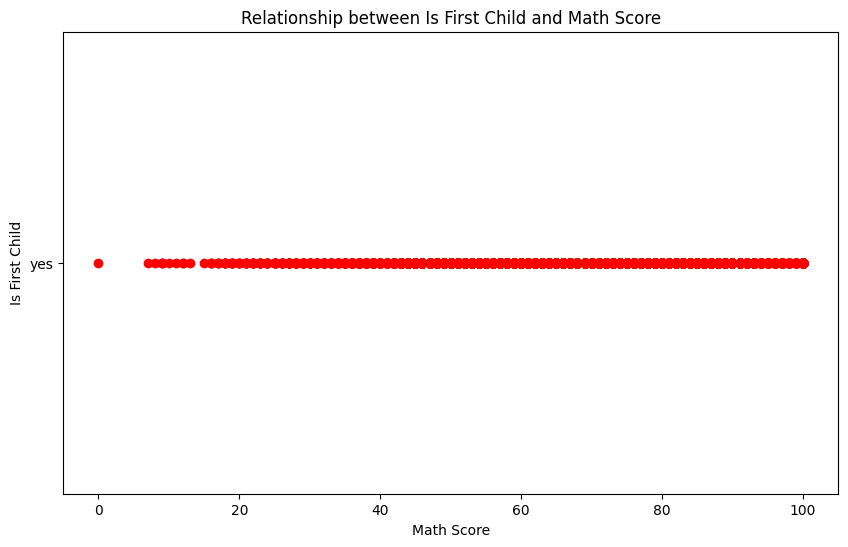

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
df = pd.read_csv('Expanded_data_with_more_features.csv')


# Filter the data for students who are first children
MathScore = df[df['IsFirstChild'] == 'yes']

# Check if there is any data to display
if not MathScore.empty:
    plt.figure(figsize=(10, 6))
    plt.scatter(MathScore['MathScore'], MathScore['IsFirstChild'], color='red')
    plt.xlabel('Math Score')
    plt.ylabel('Is First Child')
    plt.title('Relationship between Is First Child and Math Score')
    plt.show()

**^ Relationship between Is First Child and Math Score:**

The chart(Scatter) above indicates a there is no clear relationship between being a first child and math score. The data points are evenly spread out along the x-axis (math score). This indicates that there is no consistent pattern or trend in math scores based on whether someone is a first child.

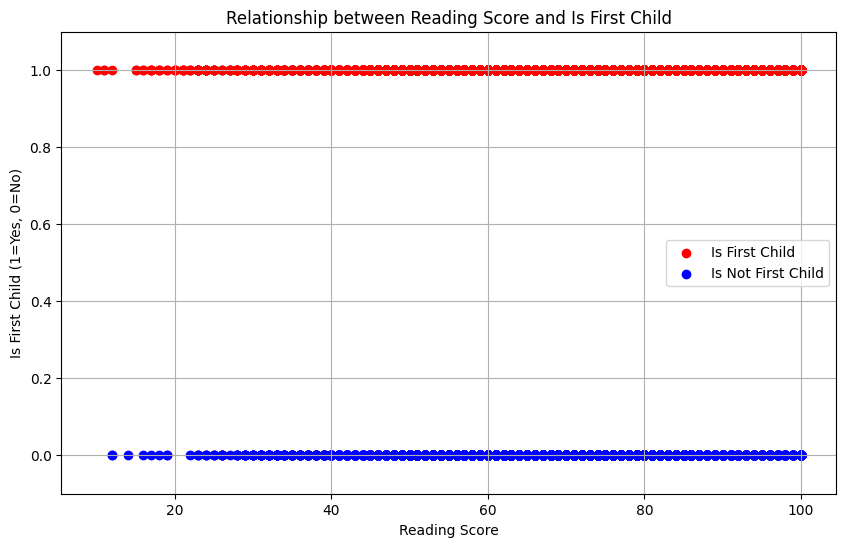

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('Expanded_data_with_more_features.csv')


# Filter the data for first children and non-first children
first_child = df[df['IsFirstChild'] == 'yes']
not_first_child = df[df['IsFirstChild'] == 'no']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(first_child['ReadingScore'], [1] * len(first_child), color='red', label='Is First Child')
plt.scatter(not_first_child['ReadingScore'], [0] * len(not_first_child), color='blue', label='Is Not First Child')

# Set labels and title
plt.xlabel('Reading Score')
plt.ylabel('Is First Child (1=Yes, 0=No)')
plt.title('Relationship between Reading Score and Is First Child')

# Add legend and grid
plt.legend()
plt.grid(True)

# Adjust y-axis limits
plt.ylim(-0.1, 1.1)

# Show the plot
plt.show()

**^ Relationship between Reading Score and Is First Child:**

The chart(Scatter) above indicates a relationship between Reading Score and Is First Child.it appears that there is a significant difference in reading scores between first children and non-first children. First children tend to have much higher reading scores compared to non-first children.

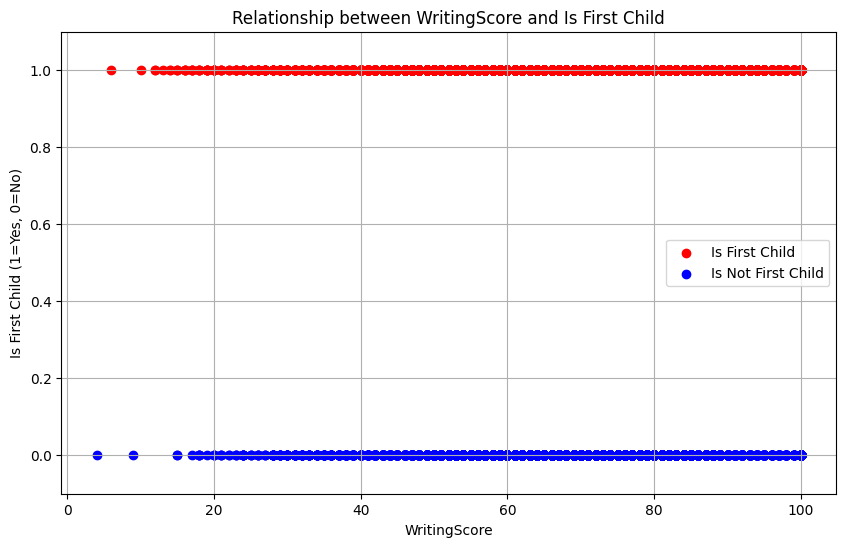

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('Expanded_data_with_more_features.csv')


# Filter the data for first children and non-first children
first_child = df[df['IsFirstChild'] == 'yes']
not_first_child = df[df['IsFirstChild'] == 'no']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(first_child['WritingScore'], [1] * len(first_child), color='red', label='Is First Child')
plt.scatter(not_first_child['WritingScore'], [0] * len(not_first_child), color='blue', label='Is Not First Child')



# Set labels and title
plt.xlabel('WritingScore')
plt.ylabel('Is First Child (1=Yes, 0=No)')
plt.title('Relationship between WritingScore and Is First Child')

# Add legend and grid
plt.legend()
plt.grid(True)

# Adjust y-axis limits
plt.ylim(-0.1, 1.1)

# Show the plot
plt.show()

**^ Relationship between WritingScore and Is First Child:**

The chart(Scatter) above indicates a relationship between Writing Score and Is First Child.it appears that there is a significant difference in writing scores between first children and non-first children. First children tend to have much higher writing scores compared to non-first children.

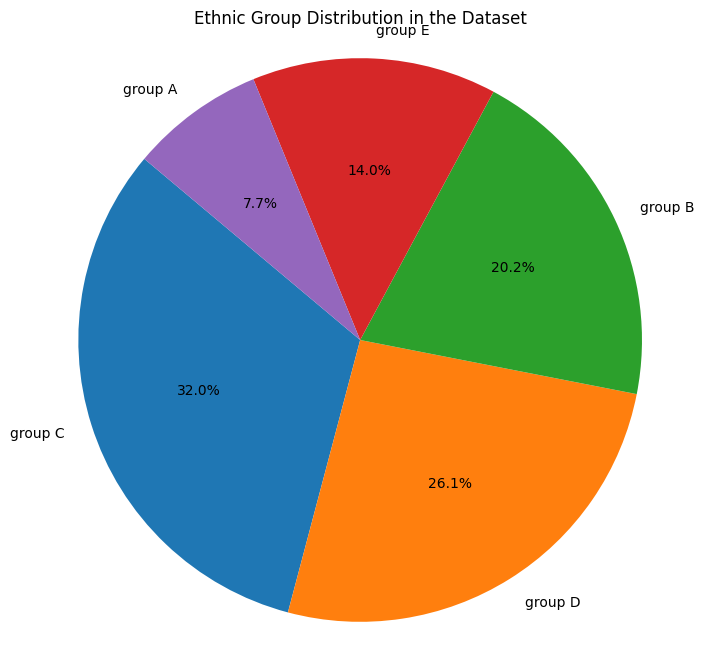

In [19]:
ethnic_counts = df['EthnicGroup'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(ethnic_counts, labels=ethnic_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Ethnic Group Distribution in the Dataset')
plt.axis('equal')
plt.show()

**^ Pie Chart: Ethnic Group Distribution**

This pie chart shows the distribution of different ethnic groups in the dataset. It allows us to see the diversity of the sample in terms of ethnic background.




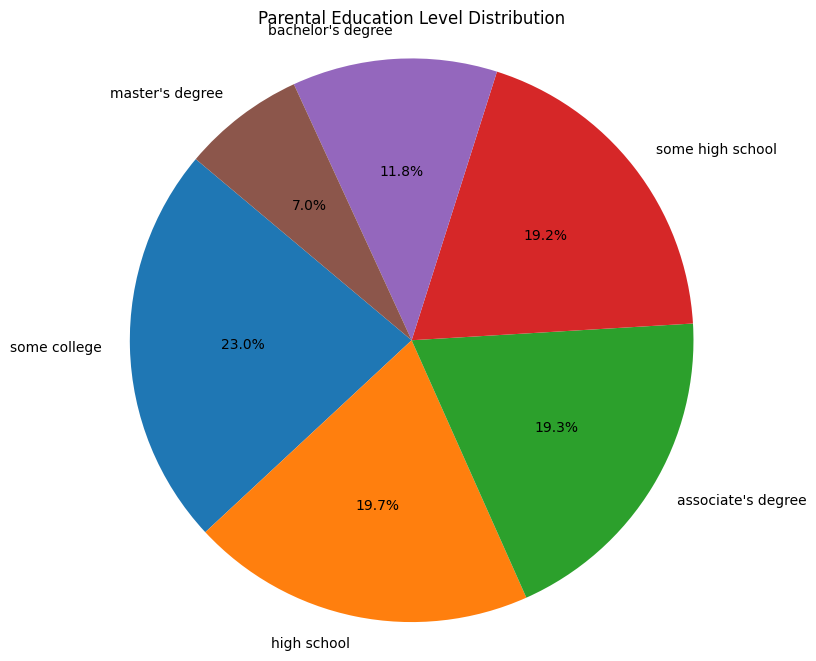

In [ ]:
# Create a pie chart for Parent Education distribution
parent_education_counts = df['ParentEduc'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(parent_education_counts, labels=parent_education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Parental Education Level Distribution')
plt.axis('equal')
plt.show()

**^ Pie Chart: Parental Education Distribution**

This pie chart shows the distribution of the highest education level of the parents. It helps us understand the educational background of the students’ parents.



<Figure size 1000x600 with 0 Axes>

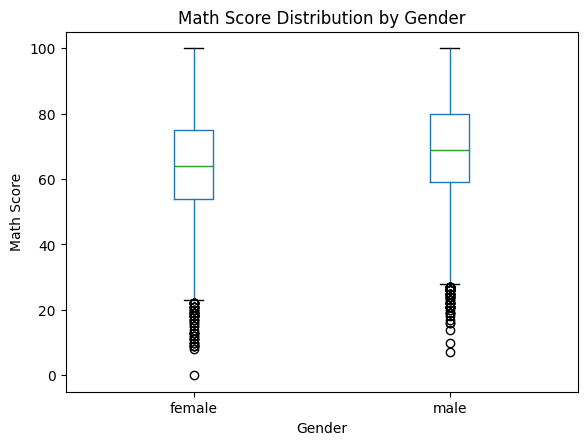

In [ ]:
# Create a box plot for Math Score by Gender
plt.figure(figsize=(10, 6))
df.boxplot(column='MathScore', by='Gender', grid=False)
plt.title('Math Score Distribution by Gender')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()

**^ Box Plot: Math Score by Gender**

This box plot visualizes the distribution of math scores for both male and female students. It helps us understand how the math performance varies by gender.



<Figure size 1000x600 with 0 Axes>

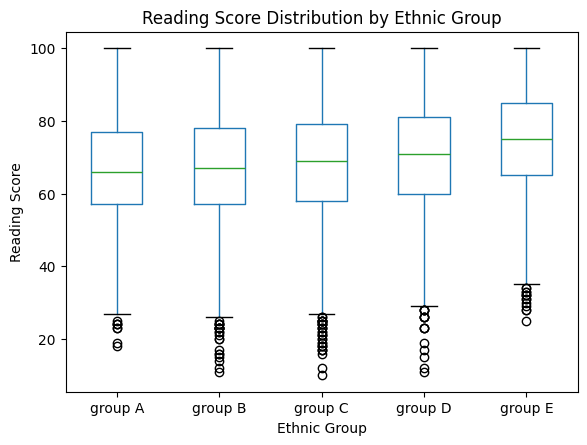

In [ ]:
# Create a box plot for Reading Score by Ethnic Group
plt.figure(figsize=(10, 6))
df.boxplot(column='ReadingScore', by='EthnicGroup', grid=False)
plt.title('Reading Score Distribution by Ethnic Group')
plt.suptitle('')
plt.xlabel('Ethnic Group')
plt.ylabel('Reading Score')
plt.show()


**^ Box Plot: Reading Score by Ethnic Group**

This box plot shows the distribution of reading scores across different ethnic groups. It helps us compare reading performance among various ethnic groups.

<Figure size 1200x600 with 0 Axes>

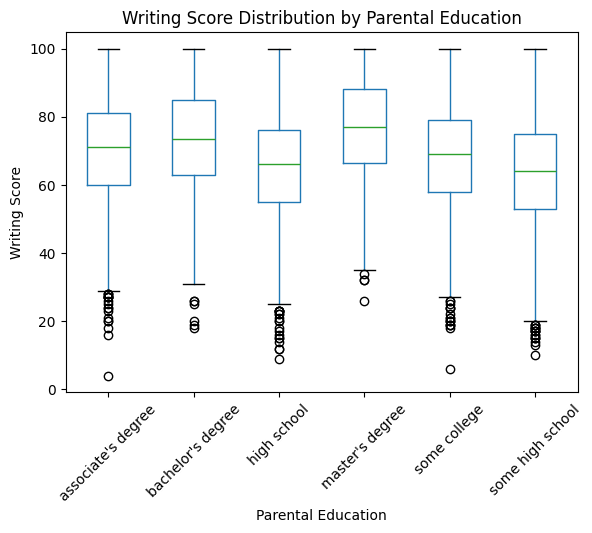

In [ ]:
# Create a box plot for Writing Score by Parent Education
plt.figure(figsize=(12, 6))
df.boxplot(column='WritingScore', by='ParentEduc', grid=False)
plt.title('Writing Score Distribution by Parental Education')
plt.suptitle('')
plt.xlabel('Parental Education')
plt.ylabel('Writing Score')
plt.xticks(rotation=45)
plt.show()


**^ Box Plot: Writing Score by Parental Education**

This box plot displays the distribution of writing scores based on parental education levels. It helps us see how the writing performance varies depending on the parents' educational background.

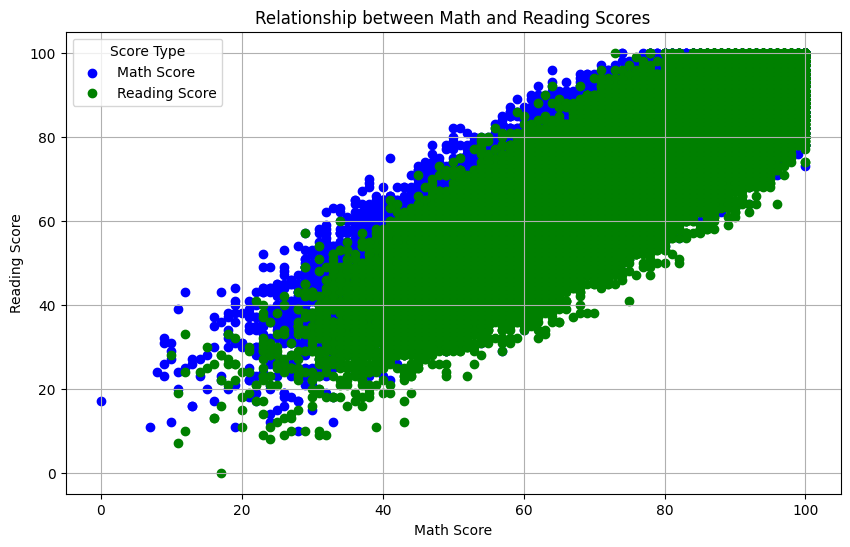

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Drop rows with missing values in 'MathScore' or 'ReadingScore'
df = df.dropna(subset=['MathScore', 'ReadingScore'])

# Create a scatter plot for Math Score vs. Reading Score
plt.figure(figsize=(10, 6))
plt.scatter(df['MathScore'], df['ReadingScore'], color='blue', label='Math Score')
plt.scatter(df['ReadingScore'], df['MathScore'], color='green', label='Reading Score')

plt.title('Relationship between Math and Reading Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.grid(True)
plt.legend(title='Score Type')  # Add a legend to differentiate between the scores
plt.show()



**^ Scatter Plot: Math Score vs. Reading Score**

This scatter plot shows the relationship between math and reading scores. It helps us identify if students who perform well in math also perform well in reading.

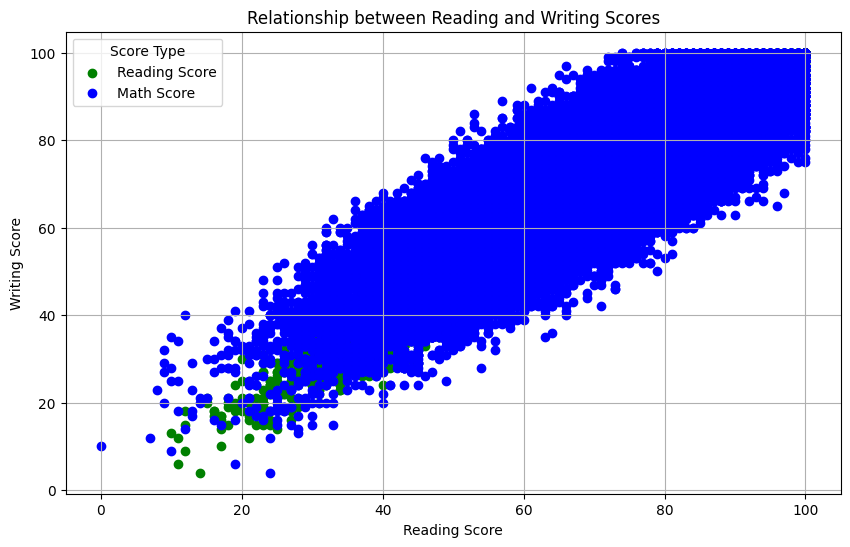

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Drop rows with missing values in 'ReadingScore' or 'WritingScore'
df = df.dropna(subset=['ReadingScore', 'WritingScore'])

# Create a scatter plot for Reading Score vs. Writing Score
plt.figure(figsize=(10, 6))
plt.scatter(df['ReadingScore'], df['WritingScore'], color='green', label='Reading Score')
plt.scatter(df['MathScore'], df['WritingScore'], color='blue', label='Math Score')

plt.title('Relationship between Reading and Writing Scores')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.grid(True)
plt.legend(title='Score Type')  # Add a legend to differentiate between the scores
plt.show()



**^ Scatter Plot: Reading Score vs. Writing Score**

This scatter plot visualizes the relationship between reading and writing scores. It helps us see if there's a correlation between reading and writing performance.

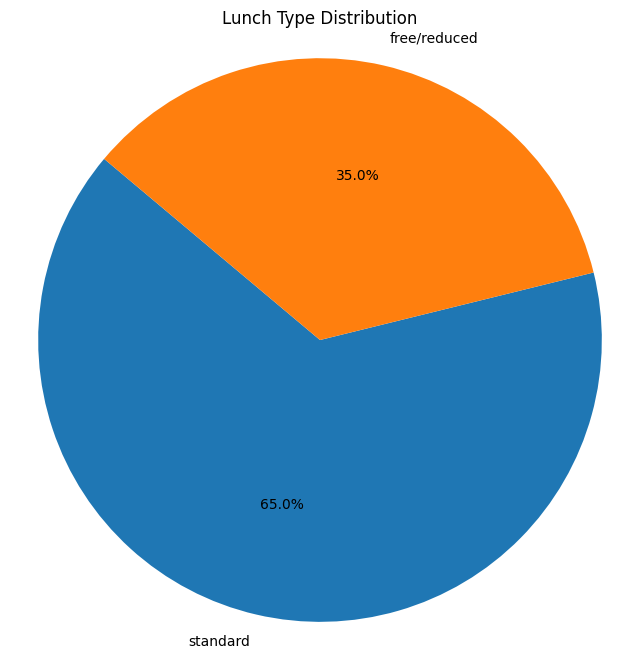

In [ ]:
# Create a pie chart for Lunch Type distribution
lunch_counts = df['LunchType'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(lunch_counts, labels=lunch_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Lunch Type Distribution')
plt.axis('equal')
plt.show()


**^ Pie Chart: Lunch Type Distribution**

This pie chart shows the distribution of lunch types (standard vs. free/reduced). It helps us understand the proportion of students who have access to standard vs. free or reduced-price lunches.

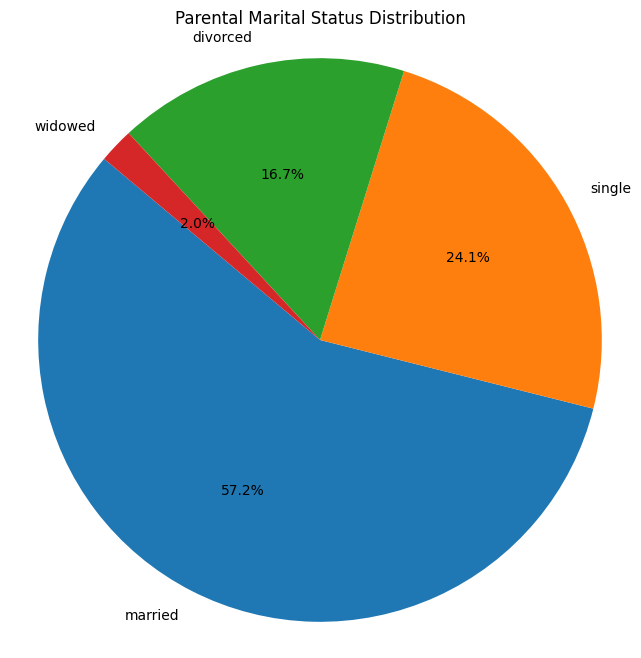

In [ ]:
# Create a pie chart for Parental Marital Status distribution
marital_counts = df['ParentMaritalStatus'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Parental Marital Status Distribution')
plt.axis('equal')
plt.show()

**^ Pie Chart: Parental Marital Status Distribution**

This pie chart shows the distribution of parental marital statuses (married, single, divorced). It helps us understand the proportion of students with different parental marital backgrounds.



<Figure size 1200x600 with 0 Axes>

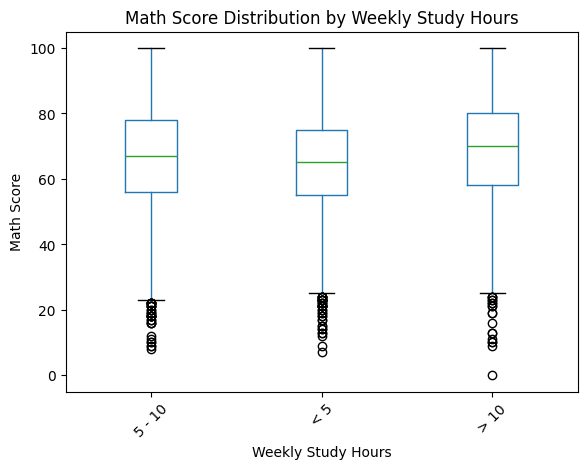

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Drop rows with missing values in 'MathScore' or 'WklyStudyHours'
df = df.dropna(subset=['MathScore', 'WklyStudyHours'])

# Create a boxplot for Math Score by Weekly Study Hours (Categorical)
plt.figure(figsize=(12, 6))
df.boxplot(column='MathScore', by='WklyStudyHours', grid=False)
plt.title('Math Score Distribution by Weekly Study Hours')
plt.suptitle('')  # Remove the default subtitle
plt.xlabel('Weekly Study Hours')
plt.ylabel('Math Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()



**^ boxplot: Weekly Study Hours VS.Math Score**

The boxplot shows the distribution of math scores for different weekly study hour categories. It compares the median, spread, and variability of scores, helping to identify whether students who study more hours tend to achieve higher scores. Outliers in each group indicate students performing unusually high or low compared to others in the same study hour category.

<Figure size 1200x600 with 0 Axes>

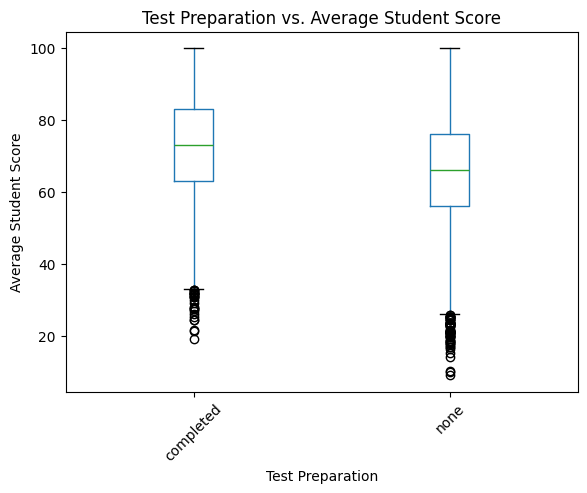

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Drop rows with missing values in TestPrep or any of the score columns
df = df.dropna(subset=['TestPrep', 'MathScore', 'ReadingScore', 'WritingScore'])

# Calculate average score
df['AverageScore'] = df[['MathScore', 'ReadingScore', 'WritingScore']].mean(axis=1)

# Create a boxplot for Average Score by TestPrep
plt.figure(figsize=(12, 6))
df.boxplot(column='AverageScore', by='TestPrep', grid=False)
plt.title('Test Preparation vs. Average Student Score')
plt.suptitle('')  # Remove the default subtitle
plt.xlabel('Test Preparation')
plt.ylabel('Average Student Score')
plt.xticks(rotation=45)
plt.show()



**^ Test Preparation vs. Student Scores:**

This boxplot displays the distribution of student scores based on whether they prepared for tests or not. It can illustrate how preparation affects academic performance. If students who prepared have higher scores compared to those who did not, this may indicate the importance of effective test preparation in enhancing performance.

<Figure size 1200x600 with 0 Axes>

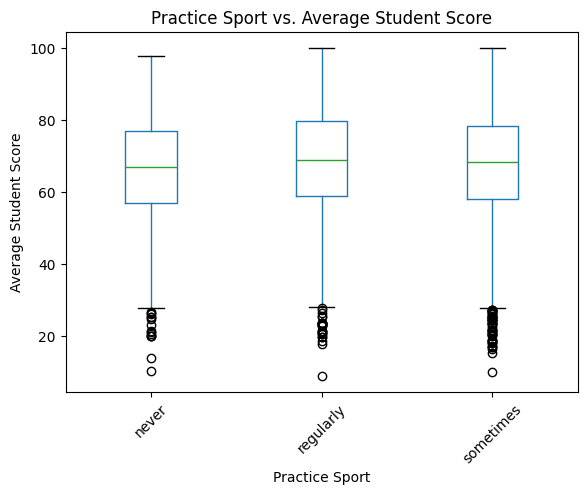

In [ ]:
# Drop rows with missing values in PracticeSport or any of the score columns
df = df.dropna(subset=['PracticeSport', 'MathScore', 'ReadingScore', 'WritingScore'])

# Create a boxplot for Average Score by PracticeSport
plt.figure(figsize=(12, 6))
df.boxplot(column='AverageScore', by='PracticeSport', grid=False)
plt.title('Practice Sport vs. Average Student Score')
plt.suptitle('')  # Remove the default subtitle
plt.xlabel('Practice Sport')
plt.ylabel('Average Student Score')
plt.xticks(rotation=45)
plt.show()


**^ Practice Sport vs. Student Scores:**

This boxplot shows the distribution of student scores based on whether they regularly practice sports. It allows for a comparison between the academic performance of students who engage in sports and those who do not. Differences in scores may suggest that participating in sports positively influences academic performance.


<Figure size 1200x600 with 0 Axes>

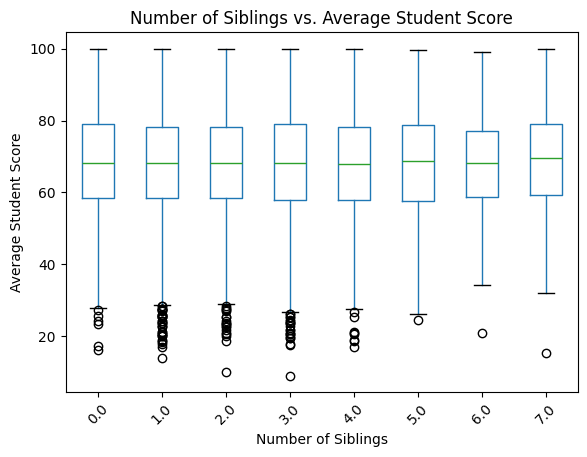

In [ ]:
# Drop rows with missing values in NrSiblings or any of the score columns
df = df.dropna(subset=['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore'])

# Create a boxplot for Average Score by NrSiblings
plt.figure(figsize=(12, 6))
df.boxplot(column='AverageScore', by='NrSiblings', grid=False)
plt.title('Number of Siblings vs. Average Student Score')
plt.suptitle('')  # Remove the default subtitle
plt.xlabel('Number of Siblings')
plt.ylabel('Average Student Score')
plt.xticks(rotation=45)
plt.show()


 **^ Number of Siblings vs. Student Scores:**

 This graph illustrates the distribution of student scores based on the number of siblings. It can help understand how the number of siblings may impact a student’s focus or available resources. It may reveal if there’s a relationship between the number of siblings and academic performance, such as noticeable score differences between students with siblings and those without.

<Figure size 1200x600 with 0 Axes>

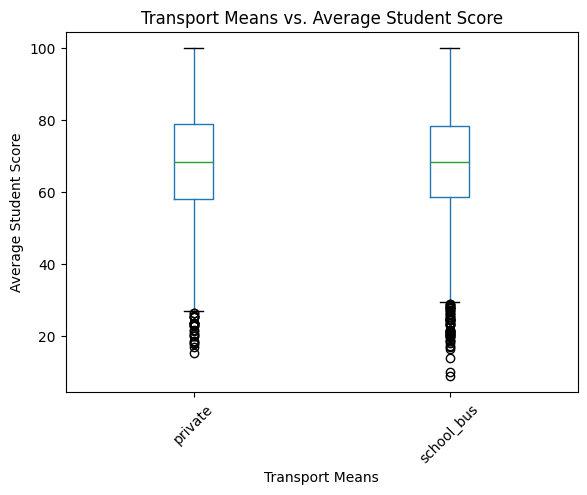

In [ ]:
# Drop rows with missing values in TransportMeans or any of the score columns
df = df.dropna(subset=['TransportMeans', 'MathScore', 'ReadingScore', 'WritingScore'])

# Create a boxplot for Average Score by TransportMeans
plt.figure(figsize=(12, 6))
df.boxplot(column='AverageScore', by='TransportMeans', grid=False)
plt.title('Transport Means vs. Average Student Score')
plt.suptitle('')  # Remove the default subtitle
plt.xlabel('Transport Means')
plt.ylabel('Average Student Score')
plt.xticks(rotation=45)
plt.show()


**^ Transport Means vs. Student Scores:**

This boxplot compares student scores based on the means of transport they use. It can uncover how transportation affects student performance. For example, score differences between students using public transport and those using private transport might indicate the importance of time and convenience in reaching school and its impact on academic performance.

### 4- Check missing “NA” :
In this step, we identify and count missing values (represented as NA or NaN) in the dataset. This helps in understanding how much and which parts of the dataset are incomplete, allowing for informed decisions on how to handle the missing data.

Missing Values: Checking for missing values is a crucial part of data cleaning. It provides insight into how much data needs to be handled (through methods such as imputation or removal).

In [20]:
# Check for missing values (NA)
missing_values = df.isna().sum()
print("\nTotal number of missing values in the dataset:", missing_values.sum())

# Create a table showing missing values for each variable
print("\nMissing Values:")
missing_values = df.isnull().sum()
missing_table = pd.DataFrame({'Variable': missing_values.index, 'Missing Values': missing_values.values})
display(missing_table)



Total number of missing values in the dataset: 13901

Missing Values:


,Variable,Missing Values
0,Unnamed: 0,0
1,Gender,0
2,EthnicGroup,1840
3,ParentEduc,1845
4,LunchType,0
5,TestPrep,1830
6,ParentMaritalStatus,1190
7,PracticeSport,631
8,IsFirstChild,904
9,NrSiblings,1572


#### Filling the missing values:
To handle missing values in categorical columns, a common approach is to fill them using the mode, which is the most frequent value in the column. This method ensures that the missing values are replaced with the most typical value, which helps maintain consistency in the dataset.

In [27]:
# For categorical columns, fill missing values with mode (most frequent value).

df['EthnicGroup'].fillna(df['EthnicGroup'].mode()[0], inplace=True)
df['ParentEduc'].fillna(df['ParentEduc'].mode()[0], inplace=True)
df['ParentMaritalStatus'].fillna(df['ParentMaritalStatus'].mode()[0], inplace=True)
df['IsFirstChild'].fillna(df['IsFirstChild'].mode()[0], inplace=True)
df['TestPrep'].fillna(df['TestPrep'].mode()[0], inplace=True)
df['WklyStudyHours'].fillna(df['WklyStudyHours'].mode()[0], inplace=True)
df['NrSiblings'].fillna(df['NrSiblings'].mode()[0], inplace=True)
df['TransportMeans'].fillna(df['TransportMeans'].mode()[0], inplace=True)

 ### 5-Removing duplicates :
 Duplicate rows in a dataset can lead to inaccurate analysis and predictions, as they repeat the same information. To ensure data quality, it's important to detect and remove any duplicate rows.

In [28]:
num_duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print("Number of duplicate rows:", num_duplicates)
print("DataFrame after dropping all duplicate rows:")
print(df)

Number of duplicate rows: 0
DataFrame after dropping all duplicate rows:
       Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0               0  female     group C   bachelor's degree      standard   
1               1  female     group C        some college      standard   
2               2  female     group B     master's degree      standard   
3               3    male     group A  associate's degree  free/reduced   
4               4    male     group C        some college      standard   
...           ...     ...         ...                 ...           ...   
30636         816  female     group D         high school      standard   
30637         890    male     group E         high school      standard   
30638         911  female     group C         high school  free/reduced   
30639         934  female     group D  associate's degree      standard   
30640         960    male     group B        some college      standard   

        TestPrep ParentMar

### 6- Detect Outlier using mean method :
Outliers can significantly impact your analysis by distorting the results. One common way to detect outliers is by using the mean method, which identifies data points that are far from the mean, typically beyond a threshold of 3 standard deviations.

In this approach:

We focus on the numerical columns (MathScore, ReadingScore, WritingScore).
We calculate the mean and standard deviation for each column.
We define an outlier as any value that lies more than 3 standard deviations away from the mean .
Detected outliers are then displayed.

In [29]:
# Focusing on the numerical columns: MathScore, ReadingScore, WritingScore
numerical_columns = ['MathScore', 'ReadingScore', 'WritingScore']

# Calculate mean and standard deviation for each numerical column
means = df[numerical_columns].mean()
std_devs = df[numerical_columns].std()

# Define the threshold as 3 standard deviations from the mean
threshold = 3

# Calculate the outlier bounds
outlier_bounds = {
    col: (means[col] - threshold * std_devs[col], means[col] + threshold * std_devs[col])
    for col in numerical_columns
}

# Detect outliers
outliers = pd.DataFrame()
for col in numerical_columns:
    lower_bound, upper_bound = outlier_bounds[col]
    outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers = pd.concat([outliers, outliers_in_col])

# Remove duplicate rows (if not already removed)
outliers = outliers.drop_duplicates()

# Display the detected outliers
display(outliers)


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
17,17,female,group B,some high school,free/reduced,none,divorced,sometimes,yes,1.0,school_bus,5 - 10,18,32,28
55,59,female,group C,some high school,free/reduced,none,single,regularly,yes,3.0,school_bus,> 10,0,17,10
751,787,female,group B,some college,standard,none,single,regularly,no,4.0,private,< 5,18,37,32
928,980,female,group B,high school,free/reduced,none,married,sometimes,yes,1.0,private,5 - 10,8,24,23
3283,471,female,group C,some high school,free/reduced,none,married,sometimes,no,2.0,private,5 - 10,17,36,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12748,526,male,group C,some high school,free/reduced,none,married,regularly,no,1.0,private,> 10,25,27,19
16326,361,male,group C,some high school,standard,none,married,regularly,yes,2.0,private,5 - 10,25,27,16
21462,848,male,group B,some high school,free/reduced,none,married,sometimes,yes,1.0,school_bus,5 - 10,25,28,20
21579,975,female,group B,high school,free/reduced,none,single,never,no,1.0,private,5 - 10,24,26,22


## 7- Data Transmission

Data transmission involves improving usability and interpretability through techniques including encoding, normalization, aggregation, and discretization. Together, these strategies increase the overall efficiency of data transmission and analysis.









**Encoding**

In [30]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from scipy import stats

# Load the dataset

df = pd.read_csv('Expanded_data_with_more_features.csv')
LE = LabelEncoder()

columns_encode= ['Gender','EthnicGroup','ParentEduc','TestPrep','PracticeSport','IsFirstChild']

for column in columns_encode:
  df[column] = LE.fit_transform(df[column])

df.to_csv('New_Data.csv' , index = False)
print("DataFrame after Encoding")
print(df)


DataFrame after Encoding
       Unnamed: 0  Gender  EthnicGroup  ParentEduc     LunchType  TestPrep  \
0               0       0            5           1      standard         1   
1               1       0            2           4      standard         2   
2               2       0            1           3      standard         1   
3               3       1            0           0  free/reduced         1   
4               4       1            2           4      standard         1   
...           ...     ...          ...         ...           ...       ...   
30636         816       0            3           2      standard         1   
30637         890       1            4           2      standard         1   
30638         911       0            5           2  free/reduced         0   
30639         934       0            3           0      standard         0   
30640         960       1            1           4      standard         1   

      ParentMaritalStatus  PracticeSpo

We used LabelEncoder to convert the categorical attributes'Gender','EthnicGroup','ParentEduc','TestPrep','PracticeSport','IsFirstChild' into numerical values, making the dataset more suited for machine learning analysis and model performance.

**Normalization**

In [31]:
import pandas as pd

df = pd.read_csv('New_Data.csv')
df = pd.DataFrame(df)

# Column to Normalize
columns_to_normalize= ['MathScore','ReadingScore','WritingScore']

# Decimal Scaling Normalization
for column in columns_to_normalize:
  max_abs_val = df[column].abs().max()
  df[column] = df[column] / (10 ** len(str(int(max_abs_val))))

df.to_csv('New_Data.csv' , index = False)
print("DataFrame after Decimal Scaling Normalization")
print(df)


DataFrame after Decimal Scaling Normalization
       Unnamed: 0  Gender  EthnicGroup  ParentEduc     LunchType  TestPrep  \
0               0       0            5           1      standard         1   
1               1       0            2           4      standard         2   
2               2       0            1           3      standard         1   
3               3       1            0           0  free/reduced         1   
4               4       1            2           4      standard         1   
...           ...     ...          ...         ...           ...       ...   
30636         816       0            3           2      standard         1   
30637         890       1            4           2      standard         1   
30638         911       0            5           2  free/reduced         0   
30639         934       0            3           0      standard         0   
30640         960       1            1           4      standard         1   

      ParentMarit

Normalization adjusted the "MathScore," "ReadingScore," and "WritingScore" attributes to a range of 0 to 1, ensuring that all three values were on the same scale. This keeps attributes with higher values from dominating the model, resulting in improved efficiency and stability throughout analysis.

**Aggregation**

In [32]:
import pandas as pd

df = pd.read_csv('New_Data.csv')
avg_score_ethnic_gender= df.groupby(['WklyStudyHours','TestPrep'])[['MathScore','ReadingScore','WritingScore']].mean()

print("average score by ethnic group and gender")
print(avg_score_ethnic_gender)


average score by ethnic group and gender
                         MathScore  ReadingScore  WritingScore
WklyStudyHours TestPrep                                       
5 - 10         0          0.069843      0.073996      0.074933
               1          0.065217      0.067292      0.065266
               2          0.067699      0.070422      0.069035
< 5            0          0.067304      0.072421      0.073175
               1          0.063094      0.065909      0.063857
               2          0.065024      0.068367      0.067193
> 10           0          0.072260      0.075062      0.076544
               1          0.066974      0.068043      0.066385
               2          0.067672      0.069579      0.069156


We grouped the dataset based on Weekly Study Hours and Test Preparation Status to obtain the average MathScore, ReadingScore, and WritingScore for each combination of these two features. This aggregate reveals how varied study habits and test preparation activities affect academic success. By obtaining the mean scores, we can evaluate how different groups of students perform based on their weekly study hours and whether or not they took a test prep course.

**Discretization**

In [33]:
import pandas as pd

df = pd.read_csv('New_Data.csv')

df = pd.DataFrame(df)

column_to_Discretize = 'NrSiblings'


Sibling_labels = ['None','Few','Moderate','Many']
bin_edges = [-1, 0, 2, 5, 7]


df[column_to_Discretize] = pd.cut(df[column_to_Discretize], bins=bin_edges , labels= Sibling_labels)

df.to_csv('New_Data.csv' , index = False)
print("DataFrame after Discretization")
print(df)

DataFrame after Discretization
       Unnamed: 0  Gender  EthnicGroup  ParentEduc     LunchType  TestPrep  \
0               0       0            5           1      standard         1   
1               1       0            2           4      standard         2   
2               2       0            1           3      standard         1   
3               3       1            0           0  free/reduced         1   
4               4       1            2           4      standard         1   
...           ...     ...          ...         ...           ...       ...   
30636         816       0            3           2      standard         1   
30637         890       1            4           2      standard         1   
30638         911       0            5           2  free/reduced         0   
30639         934       0            3           0      standard         0   
30640         960       1            1           4      standard         1   

      ParentMaritalStatus  Pract

Discretization divided the continuous 'NrSiblings' attribute into four category groupings labeled "None," "Few," "Moderate," and "Many." This reduction makes the data easier to read and compare, improving usability and providing better insights into our study.

# **8- selection feature**

correlatoin coefficient

In [35]:

import pandas as pd
import numpy as np


data1 = pd.read_csv("New_Data.csv")


feature1 =data1['Gender']
feature2 =data1['MathScore']
feature3 =data1['ReadingScore']
feature4 =data1['WritingScore']
feature5 =data1['PracticeSport']
feature6 =data1['IsFirstChild']



corrgen_math = np.corrcoef(feature1, feature2)[0,1]
print("correlatoin between gender and math score:" ,{corrgen_math})

corrgen_read = np.corrcoef(feature1, feature3)[0,1]
print("correlatoin between gender and reading score:" ,{corrgen_read})

corrgen_write = np.corrcoef(feature1, feature4)[0,1]
print("correlatoin between gender and writing score:" ,{corrgen_write})


corrgroup_math = np.corrcoef(feature5, feature2)[0,1]
print("correlatoin between PracticeSport and math score:" ,{corrgroup_math})

corrgroup_read = np.corrcoef(feature5, feature3)[0,1]
print("correlatoin between PracticeSport and reading score:" ,{corrgroup_read})

corrgroup_write = np.corrcoef(feature5, feature4)[0,1]
print("correlatoin between PracticeSport and writing score:" ,{corrgroup_write})


corr1child_math = np.corrcoef(feature6, feature2)[0,1]
print("correlatoin between Is First Child and math score:" ,{corr1child_math})

corr1child_read = np.corrcoef(feature6, feature3)[0,1]
print("correlatoin between Is First Child and reading score:" ,{corr1child_read})

corr1child_write = np.corrcoef(feature6, feature4)[0,1]
print("correlatoin between Is First Child and writing score:" ,{corr1child_write})





correlatoin between gender and math score: {0.1623908006121841}
correlatoin between gender and reading score: {-0.2370967760282752}
correlatoin between gender and writing score: {-0.2893115892795493}
correlatoin between PracticeSport and math score: {0.015395462164531732}
correlatoin between PracticeSport and reading score: {0.007066646904781266}
correlatoin between PracticeSport and writing score: {0.007027292969345678}
correlatoin between Is First Child and math score: {0.012787856483078466}
correlatoin between Is First Child and reading score: {0.008714836647033396}
correlatoin between Is First Child and writing score: {0.007072031043972594}


The correlation results show weak relationships between Gender, PracticeSport, Is First Child, and the performance scores (Math, Reading, Writing). gender shows a small effect on scores, with females performing better in reading and writing, while practicing sports and being the first child have little to no effect on academic performance.

•chi square


In [36]:
import pandas as pd
from scipy.stats import chi2_contingency
data1 = pd.read_csv('New_Data.csv')
data1 = pd.DataFrame(data1)


contingency_table = pd.crosstab(data1['ParentEduc'], data1['WklyStudyHours'])
print("Contingency Table:")
print(contingency_table)


chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

Contingency Table:
WklyStudyHours  5 - 10   < 5  > 10
ParentEduc                        
0                 2975  1459   945
1                 1790   922   557
2                 3090  1479   934
3                 1017   588   362
4                 3510  1816  1116
5                 2859  1502   982
6                 1005   472   306

Chi-Square Statistic: 20.350897606710472
Degrees of Freedom: 12
Expected Frequencies:
[[2943.71872263 1492.69696153  942.58431584]
 [1788.99730513  907.1623661   572.84032877]
 [3011.57912821 1527.10752543  964.31334636]
 [1076.46304655  545.85144513  344.68550832]
 [3525.45752206 1787.68429563 1128.85818231]
 [2924.01731456 1482.70679782  936.27588762]
 [ 975.76696086  494.79060837  312.44243078]]


The Chi-Square indicates a significant association between parents' education levels and students' weekly study hours, suggesting that the educational background of parents influences how much time students spend studying each week.

**Drop uncorrelation attributes:**

In [38]:
import pandas as pd
data1= pd.read_csv('New_Data.csv')
data1= data1.drop(['TransportMeans','LunchType'], axis=1)

# Save the updated dataset
data1.to_csv('Preprocessed_dataset.csv', index=False)
print(data1);

       Unnamed: 0  Gender  EthnicGroup  ParentEduc  TestPrep  \
0               0       0            5           1         1   
1               1       0            2           4         2   
2               2       0            1           3         1   
3               3       1            0           0         1   
4               4       1            2           4         1   
...           ...     ...          ...         ...       ...   
30636         816       0            3           2         1   
30637         890       1            4           2         1   
30638         911       0            5           2         0   
30639         934       0            3           0         0   
30640         960       1            1           4         1   

      ParentMaritalStatus  PracticeSport  IsFirstChild NrSiblings  \
0                 married              1             1   Moderate   
1                 married              2             1        NaN   
2                  singl

The updated dataset excludes the TransportMeans column and LunchType column contained irrelevant information, and is now saved as Preprocessed_dataset.csv, making it ready for further analysis and modeling.